# Plot
Convenience class for data visualization.

In [1]:
%autosave 0
%load_ext autoreload
%autoreload 2

from pandas import read_csv, to_datetime
from tools import *
from plot import Plot

Autosave disabled


## build a Plot
First argument is a matplotlib *style*.<br>
Keyword arguments become defaults for plots.

In [2]:
plot = Plot('bmh', figsize=(6, 4))

## load example data

In [3]:
data = read_csv(DATADIR / 'examples/energy.csv')
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
data = (
    data.loc[lambda df: df['year'].ge(2000)]
    .assign(year = to_datetime(data['year'], format='%Y'))
    .assign(hydro = data['conv._hydro'] + data['ps_hydro'])
    .drop(columns = 'total conv._hydro ps_hydro'.split())
    .rename(columns = {'natural_gas': 'gas', 'net_imports': 'imports'})
    .set_index('year').sort_index()
    .sort_index(axis=1)
)
data = data[data.sum().nlargest(5).index]
afew(data)

,gas,nuclear,hydro,imports,coal
year,,,,,
2016-01-01,56793.0,41638,27150.0,26117.0,1493.0
2008-01-01,43856.0,43209,27501.0,23899.0,19154.0
2004-01-01,27294.0,40640,28153.0,17646.0,22853.0
2000-01-01,39729.0,31508,26753.0,15723.0,25010.0
2012-01-01,59462.0,40775,25303.0,26180.0,4551.0


## area

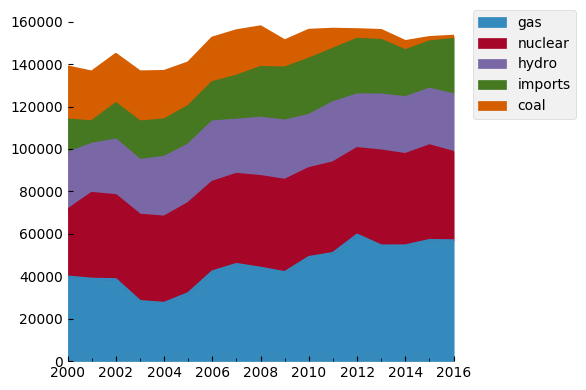

In [4]:
plot.area(data)

## bar, barh

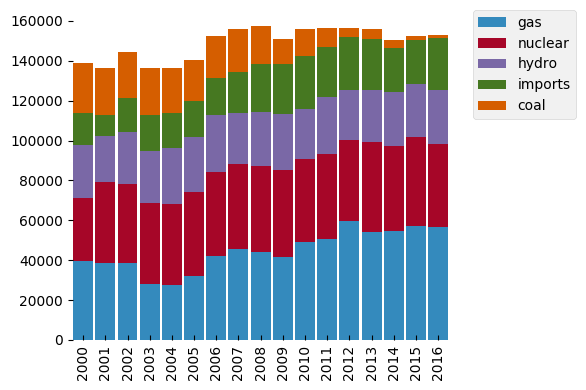

In [5]:
plot.bar(data.set_index(data.index.year))

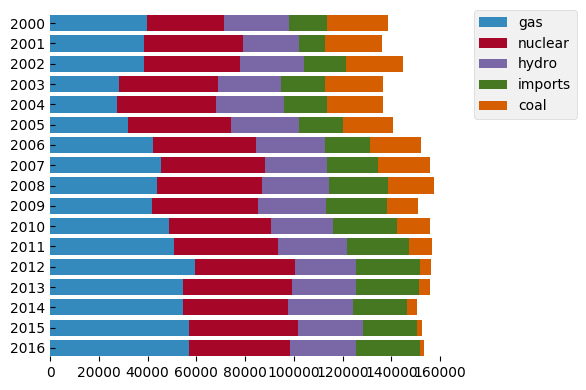

In [6]:
plot.barh(data.set_index(data.index.year))

## box, boxh

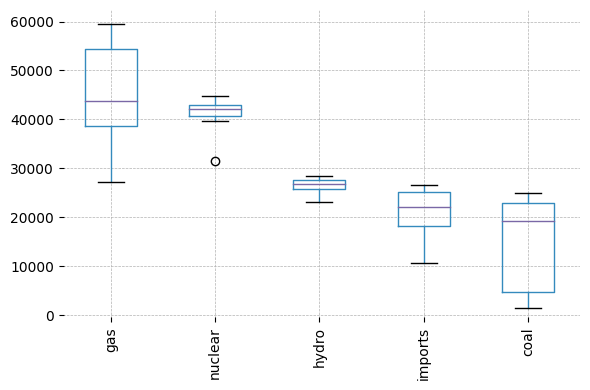

In [7]:
plot.box(data)

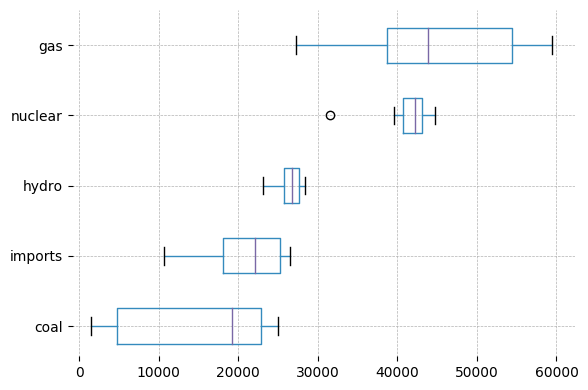

In [8]:
plot.boxh(data)

## density

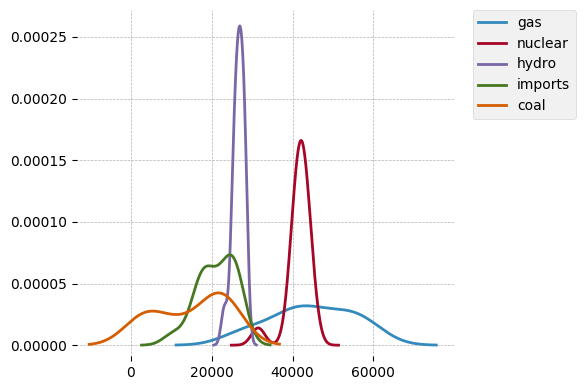

In [9]:
plot.density(data)

## heat

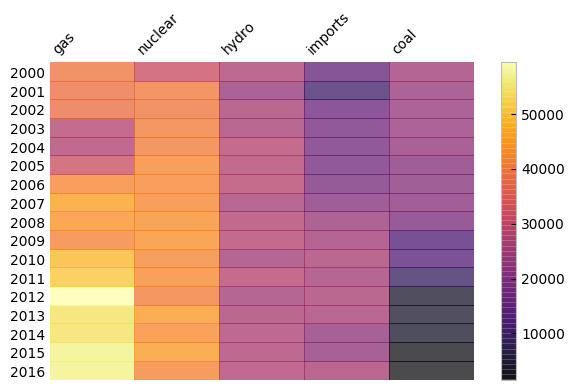

In [10]:
plot.heat(data.set_index(data.index.year), colorbar=True)

## hist

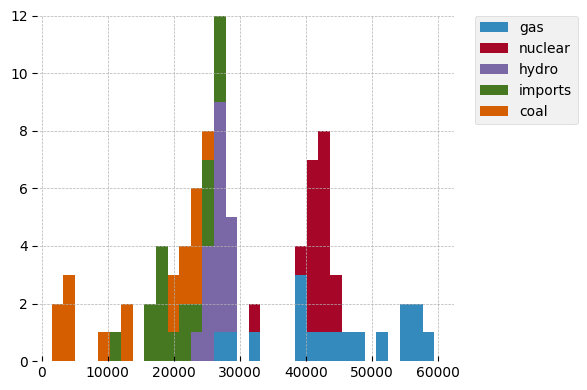

In [11]:
plot.hist(data)

## line

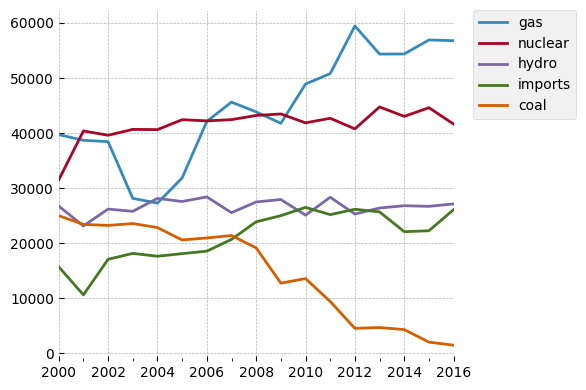

In [12]:
plot.line(data)

## scatter

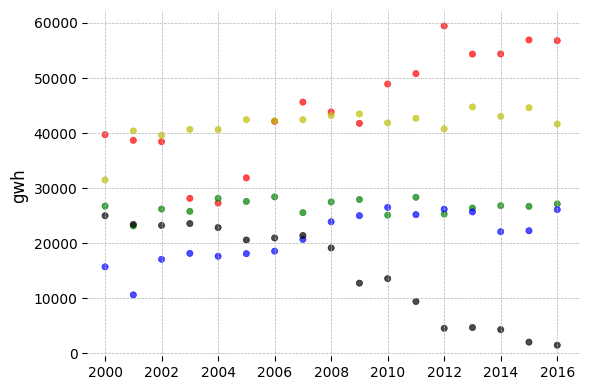

In [13]:
points = data.stack().reset_index()
points.columns = 'year source gwh'.split()
points['year'] = points['year'].dt.year
points['color'] = points['source'].map(dict(zip(data.columns, 'rygbk')))
points = points['year gwh color'.split()]

plot.scatter(points, ylabel='gwh')

## help

In [14]:
help(Plot)

Help on class Plot in module plot:

class Plot(builtins.object)
 |  Plot(style='bmh', **kwargs)
 |  
 |  Plot maker for pandas.DataFrame or .Series inputs.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, data, **kwargs)
 |      Call self as a function.
 |  
 |  __init__(self, style='bmh', **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  area(self, data, **kwargs)
 |      AxesSubplot: Area plot for each column.
 |  
 |  axes(self)
 |  
 |  bar(self, data, **kwargs)
 |      AxesSubplot: Bar plot for each column.
 |  
 |  barh(self, data, **kwargs)
 |      AxesSubplot: Horizontal bar plot for each column.
 |  
 |  box(self, data, **kwargs)
 |      AxesSubplot: Box plot for each column.
 |  
 |  boxh(self, data, **kwargs)
 |      AxesSubplot: Horizontal box plot for each column.
 |  
 |  density(self, data, **kwargs)
 |      AxesSubplot: Probability density estimate for each column.
 |  
 |  